# **<u>Project Title : Hotel Bookings Data Analysis And Prediction**

---



In [3]:
#importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Collection**

In [4]:
# loading the csv data to a Pandas DataFrame
df=pd.read_csv("/content/hotel_bookings.csv")

In [5]:
# printing 10 rows of the dataset
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [6]:
#identifying shape of the dataset
df.shape

(119390, 32)

In [7]:
#understanding some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# statistical measures about the data
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## **Preprocessing of dataset**


* In this section, we will find the missing values in the dataset.

* we will  work on the missing values


Now lets check how many values are missing from our dataset.

In [9]:
# Checking Null Values
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


**We can see that we have 4 columns [ children, country , agent , company ] with missing values.**


---



Lets drop the null values of some columns which are very less as compare to the dataset

In [10]:
#droping null values of column country, agent , children
df.dropna(subset=['country',"agent","children"], inplace=True)

**The columns country ,agent ,children have a less number  of missing values. We will remove the full row of missing values.**

In [11]:
# rechecking Null Values
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


**The columns “company” have a high number of missing values., we will drop it further.**

In [12]:
#identifying shape of the dataset
df.shape

(102894, 32)

**Now you can see that we have 102894 rows here**

In [13]:
#droping column company from the dataset
df.drop(columns=["company"],inplace=True)

In [14]:
# printing 5 rows of the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06


In [15]:
#convert reservation_status_date into datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
# month and year from the reservation date
df['reservation_month'] = df['reservation_status_date'].dt.month_name()
df['reservation_year'] = df['reservation_status_date'].dt.year



## **Exploratory Analysis**

* In this section, we will explore the data to get insights about it.

* we will see the statistical measures of every variable .

* relationships between variables




### **Feature Hotel**

Distribution of stays across different hotel types.

In [16]:
# counting the hotel variable from data set
df['hotel'].value_counts()

,count
hotel,
City Hotel,71181
Resort Hotel,31713


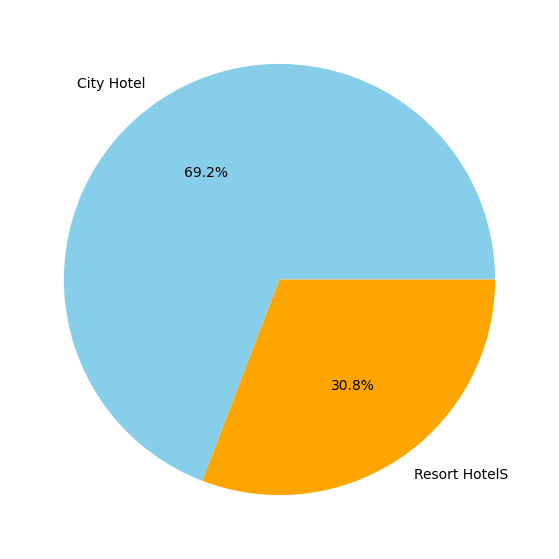

In [17]:
# Creating dataset
hotels = ['City Hotel','Resort HotelS']
data=df['hotel'].value_counts()
colors = ['skyblue', 'orange']
highlight =(0,0)
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = hotels,autopct='%1.1f%%', explode=highlight,colors=colors)
 # show plot
plt.show()

**approx. 69.2 % People are booking city hotels which is more than Resort hotels.**


### **Feature lead_time and arrival_date_year**

<Axes: xlabel='arrival_date_year', ylabel='lead_time'>

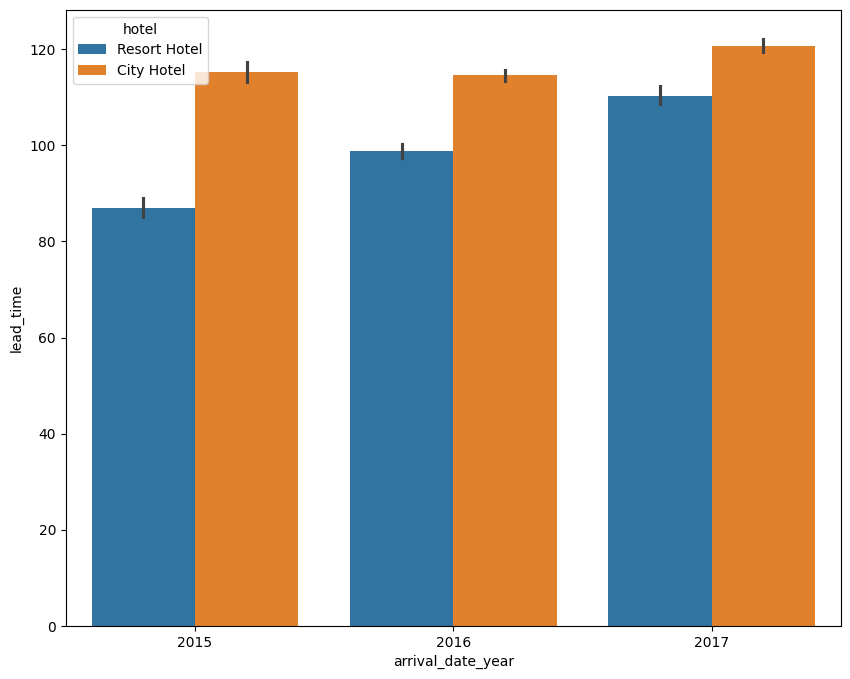

In [18]:
#plotting bar plot for understanding count of lead_time for arrival_date_year
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='arrival_date_year',y='lead_time',hue='hotel',ax=ax)

**For two years 2015, 2016 ,you will see bookings with a lead time around 100 days for resort hotel and approx 110 days for city hotel, and for year 2017  lead time was more than 100 days for city hotel and resort hotel**  .

### **Feature is_canceled**

<Axes: xlabel='hotel', ylabel='count'>

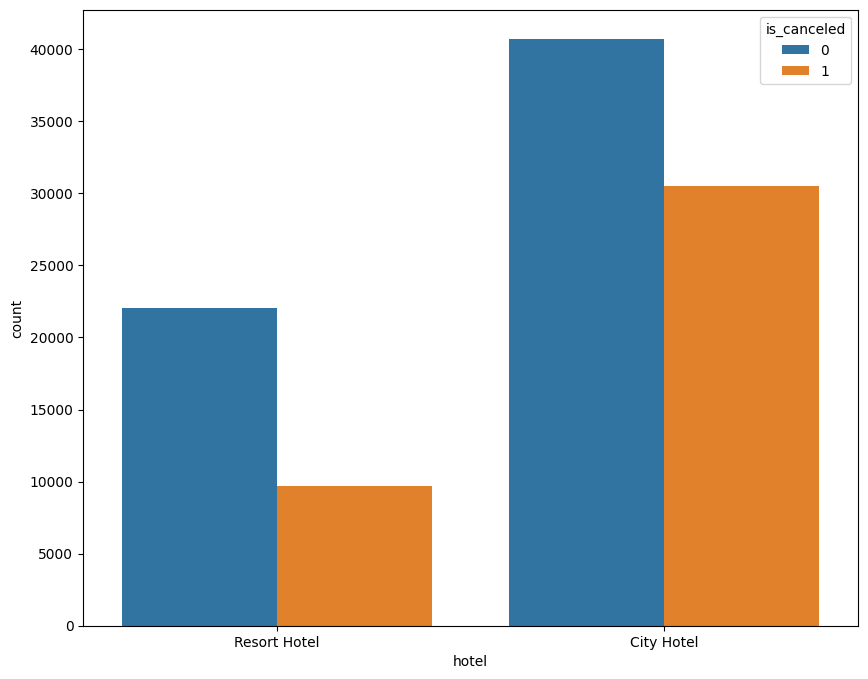

In [19]:
# checking the count distribution of hotel Variable and relation with is_canceled
fig,ax=plt.subplots(figsize=(10,8))
sns.countplot(x ='hotel', hue='is_canceled', data = df,ax=ax)

**According to the bar graph, around 40000 of bookings from city hotel and around 23000 bookings from Resort hotel were not canceled**

### **Feature Year**

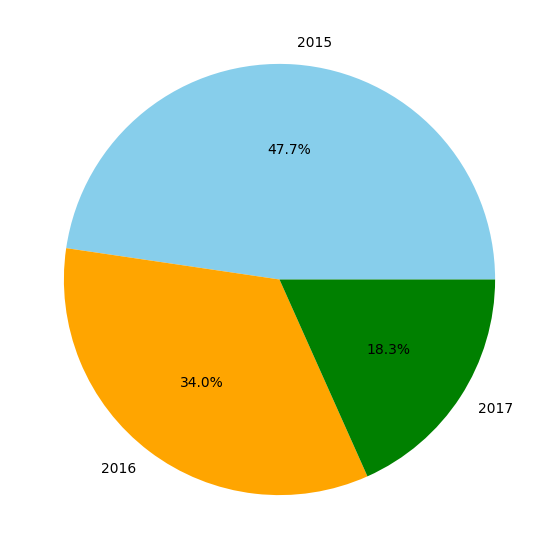

In [20]:
# Creating dataset
years = ['2015','2016','2017']
data=df['arrival_date_year'].value_counts()
colors = ['skyblue', 'orange','green']
highlight =(0,0)
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = years,autopct='%1.1f%%',colors=colors)
 # show plot
plt.show()

**according pie chart, year 2015 was the busiest year with approx 47.7% of bookings**


---



### **Feature arrival date month**
Seasonality in bookings.

<Axes: xlabel='arrival_date_month', ylabel='count'>

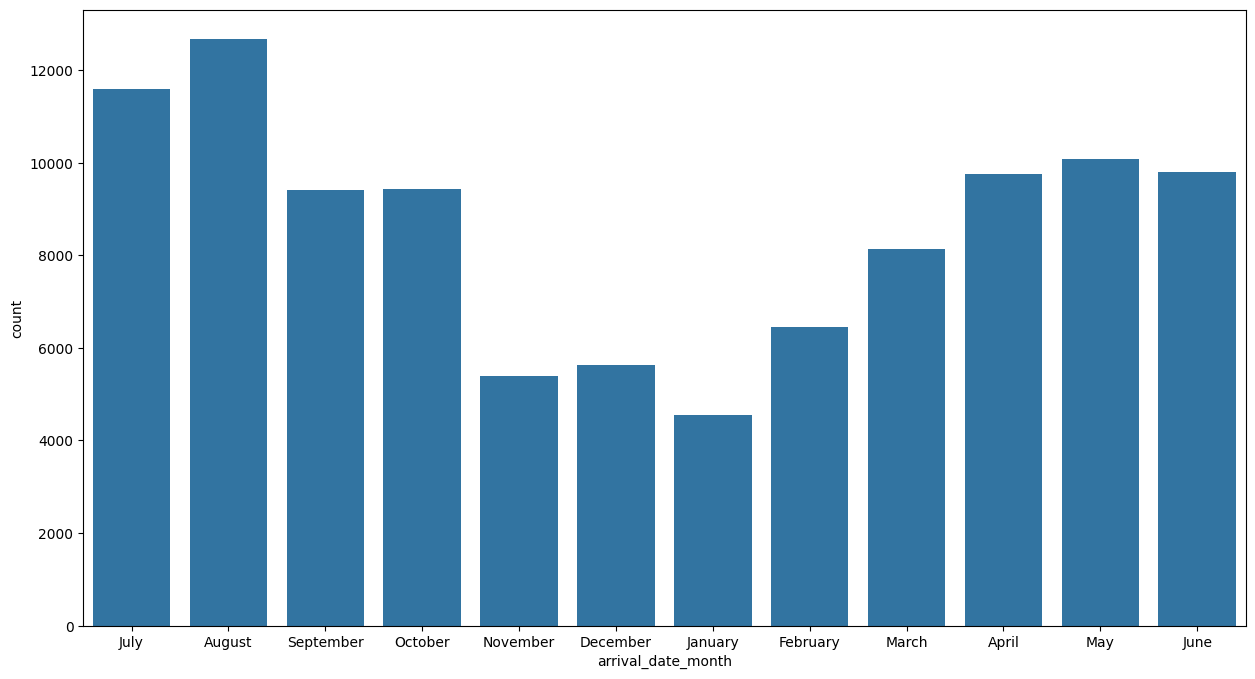

In [21]:
# checking the count distribution of arrival_date_month Variable
fig,ax=plt.subplots(figsize=(15,8))
sns.countplot(x ='arrival_date_month', data = df,ax=ax)

**AS you can see traffic in the january and November is less as compare to the other months**


---



### **Relation between is_canceled and Hotel**

In [22]:
#calculating percentage of is_canceled for hotel
df.groupby('is_canceled')['hotel'].value_counts(normalize = True)

is_canceled  hotel       
0            City Hotel      0.648845
             Resort Hotel    0.351155
1            City Hotel      0.758871
             Resort Hotel    0.241129
Name: proportion, dtype: float64

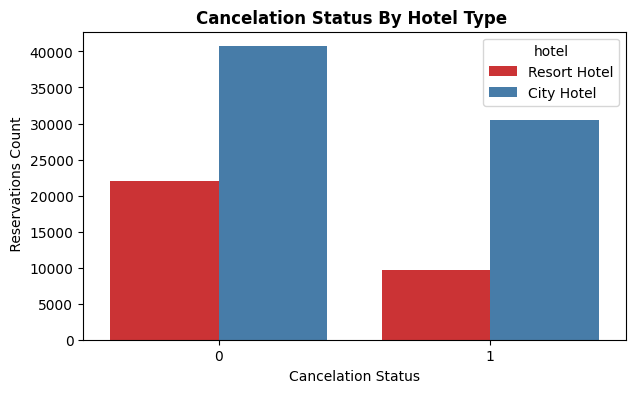

In [23]:
# plotting the count plot of hotel for is_canceled variable
plt.figure(figsize = (7,4))
sns.countplot(x= 'is_canceled',data = df,hue = 'hotel',palette= 'Set1')
plt.title("Cancelation Status By Hotel Type ", weight = 'bold')
plt.xlabel("Cancelation Status")
plt.ylabel(" Reservations Count")
plt.show()

* **For the Resort Hotel, total of 25.14% Bookings were cancelled**
* **For the City Hotel, total of 74.85% Bookings were cancelled**

### **Feature adult**

<Axes: xlabel='adults', ylabel='count'>

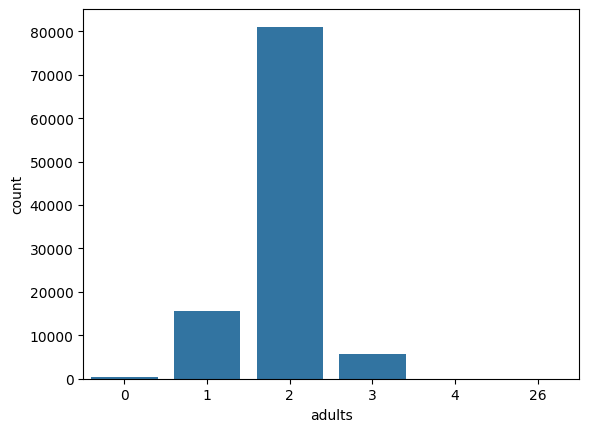

In [24]:
# checking the count distribution of adults Variable
sns.countplot(x ='adults', data = df)

**accordingly Couple (or 2 adults) is the most popular accommodation type.**


---



### **Feature Meal**

Type of meal booked. Categories are presented in standard hospitality meal packages:

Undefined/SC — no meal package;

BB — Bed & Breakfast;

HB — Half board (breakfast and one other meal — usually dinner);

FB — Full board (breakfast, lunch and dinner)

<Axes: xlabel='meal', ylabel='count'>

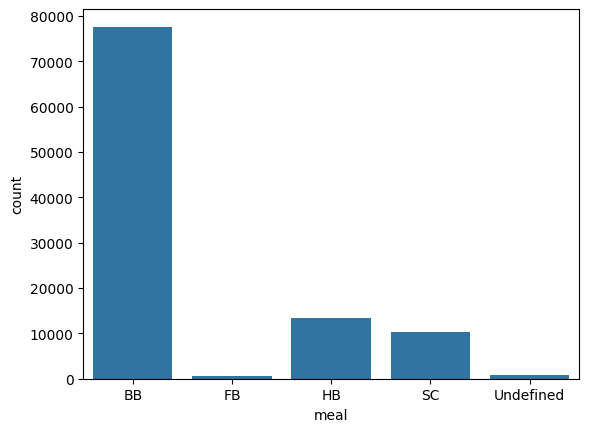

In [25]:
# checking the count distribution of meal Variable
sns.countplot(x ='meal', data = df)

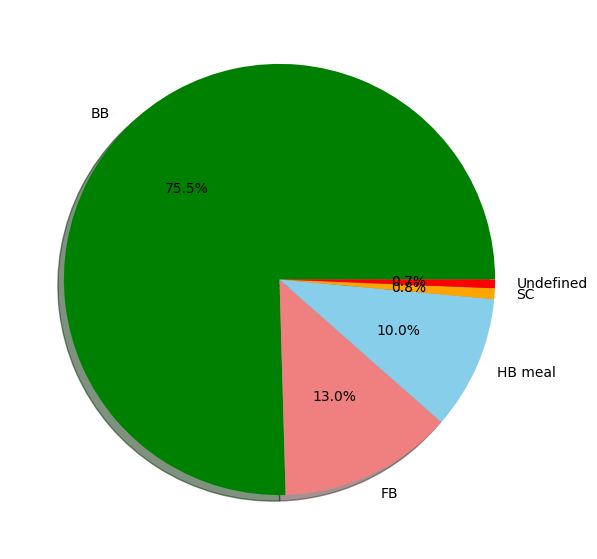

In [26]:
# Creating dataset
meals = ['BB','FB','HB meal','SC','Undefined']
data=df['meal'].value_counts()
colors = ['green','lightcoral','skyblue','orange','red']
highlight =(0,0,0,0,0)
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = meals,autopct='%1.1f%%',colors=colors,shadow=True)
 # show plot
plt.show()

**The Bed & Breakfast option is the most popular, with a frequency of 75.5%.**


---



### **Feature country**

In [27]:
country_counts = df.country.value_counts().head(10)


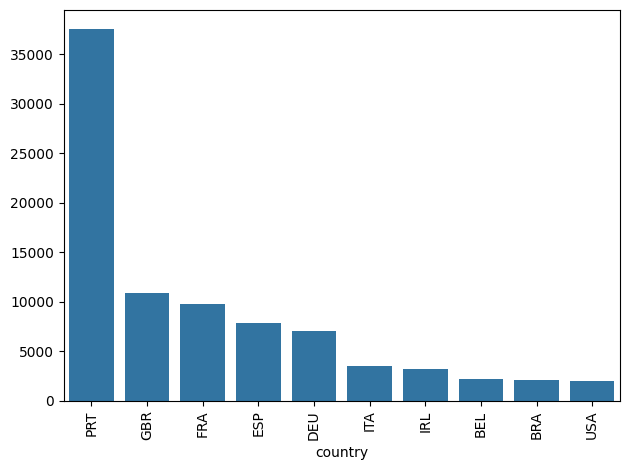

In [28]:
sns.barplot(x=country_counts.index, y=country_counts.values)
#OR
#sns.barplot(x=country_counts.index, y=country_counts) #since country_counts is Series

#for better visualization rotate the x axis labels
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **Feature market segment**

Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

<Axes: xlabel='market_segment', ylabel='count'>

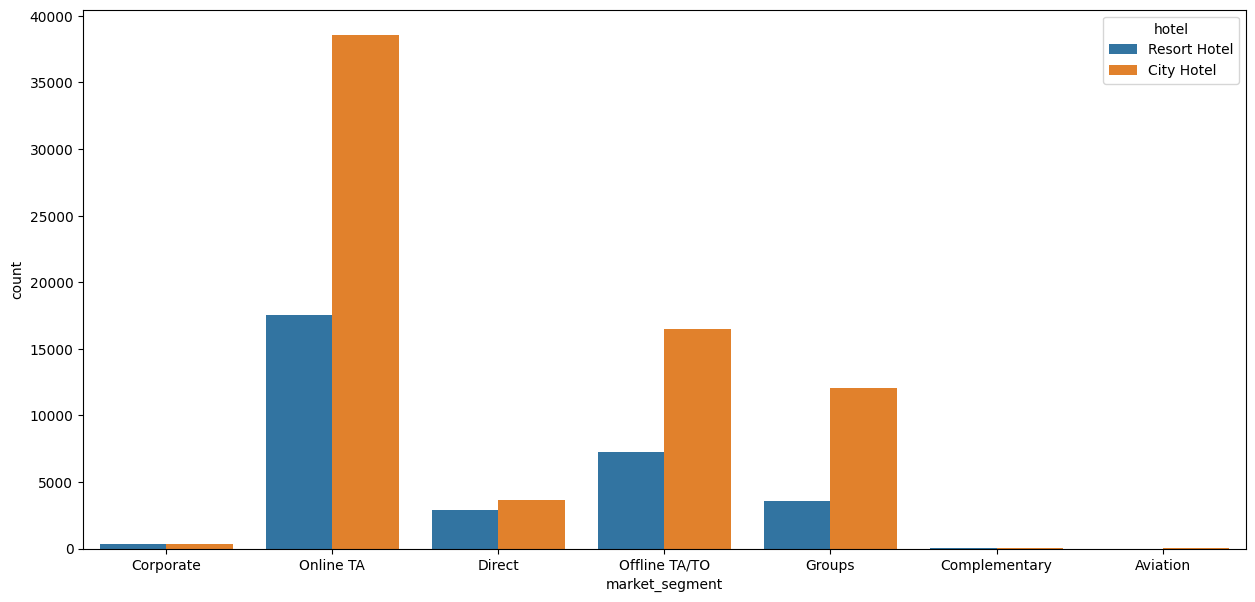

In [29]:
#plotting the bar plot of market_segment Variable
plt.figure(figsize=(15,7))
sns.countplot(x ='market_segment',hue="hotel", data = df)

**Around 47% of bookings are made via Online Travel Agents, almost 20% of bookings are made via Offline Travel Agents and less than 20% are Direct bookings without any other agents.**






---



### **Feature distribution channel**

Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

<Axes: xlabel='distribution_channel', ylabel='count'>

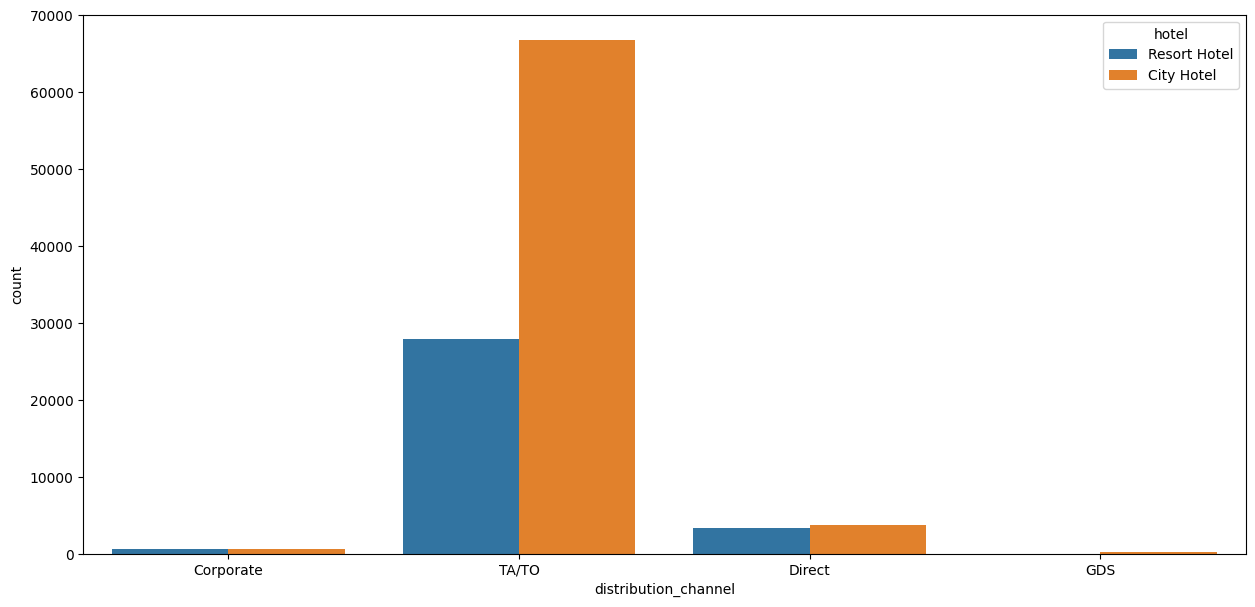

In [30]:
# checking the count distribution of distribution_channel over hotels
plt.figure(figsize=(15,7))
sns.countplot(x ='distribution_channel',hue="hotel", data = df)

**Bookings through Travel Agents,Tour Operators is preferred by most of the people**

*  **approx. 70000 city hotels are book by Travel Agents & Tour Operators**
*  **approx. 30000 resort hotels are book by Travel Agents & Tour Operators**



---



### **Feature reserved_room_type**

Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

<Axes: xlabel='reserved_room_type', ylabel='count'>

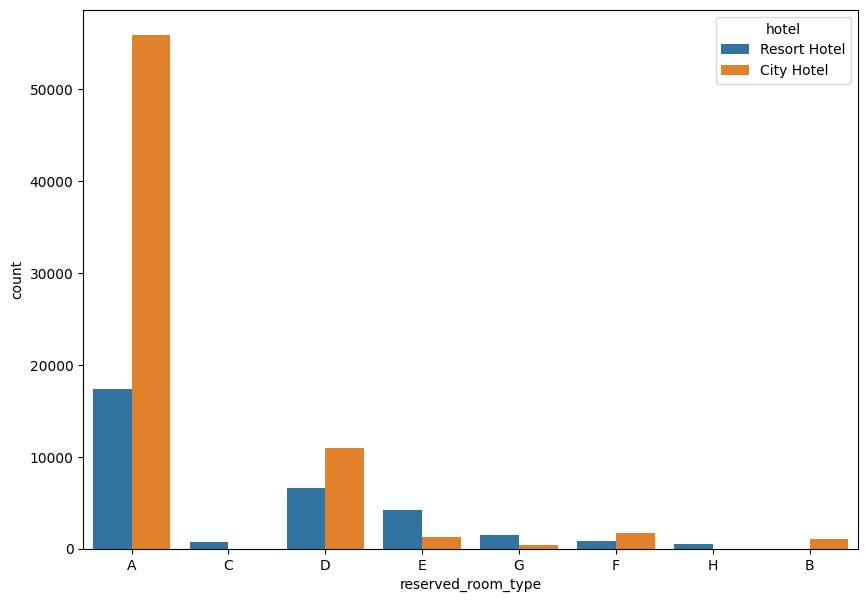

In [31]:
# checking the count distribution of reserved_room_type Variable
plt.figure(figsize=(10,7))
sns.countplot(x ='reserved_room_type',hue="hotel", data = df)

### **Feature Deposit Type**

Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

* No Deposit — no deposit was made;

* Non Refund — a deposit was made in the value of the total stay cost;

* Refundable — a deposit was made with a value under the total cost of stay.

<Axes: xlabel='deposit_type', ylabel='count'>

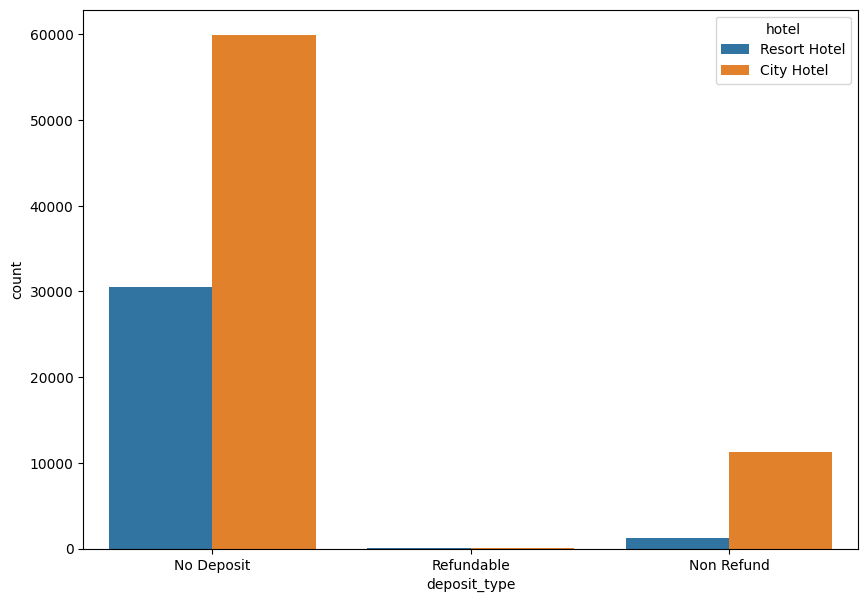

In [32]:
# checking the count distribution of deposit_type Variable
plt.figure(figsize=(10,7))
sns.countplot(x ='deposit_type',hue="hotel", data = df)

**people preferred No deposite type most for both resort and city hotels**

### **Relation between Deposit Type on is Canceled**

In [33]:
#calculating percentage of is_canceled for deposit_type
df.groupby('deposit_type')['is_canceled'].value_counts(normalize = True)

deposit_type  is_canceled
No Deposit    0              0.693669
              1              0.306331
Non Refund    1              0.995688
              0              0.004312
Refundable    0              0.500000
              1              0.500000
Name: proportion, dtype: float64

Text(0, 0.5, 'Reservation Count')

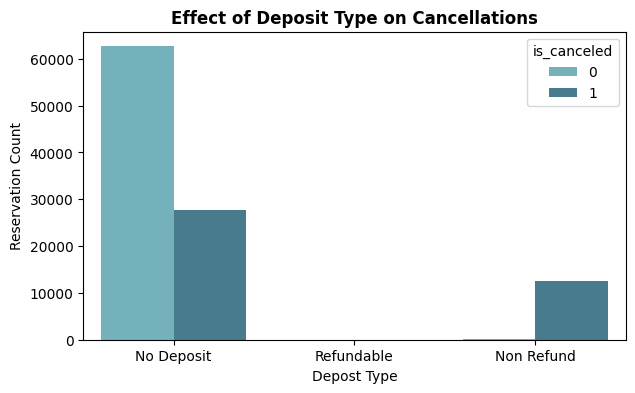

In [34]:
# plotting the count plot of deposit_type for is_canceled variable
plt.figure(figsize=(7,4))
sns.countplot(x= 'deposit_type',hue = 'is_canceled',data = df,palette= 'GnBu_d')
plt.title('Effect of Deposit Type on Cancellations',weight = 'bold')
plt.xlabel('Depost Type')
plt.ylabel('Reservation Count')

* **Around 30% bookings were cancelled by guests with no deposit, followed by 50% bookings were cancelled which are with Refundable policy**
* **So its obvious that guests who do not pay any deposit while booking are likely to cancel more reservations**

### **Feature Customer Type**
Type of booking, assuming one of four categories:

Contract — when the booking has an allotment or other type of contract associated to it;

Group — when the booking is associated to a group;

Transient — when the booking is not part of a group or contract, and is not associated to other transient booking;

Transient-party — when the booking is transient, but is associated to at least other transient booking

<Axes: xlabel='customer_type', ylabel='count'>

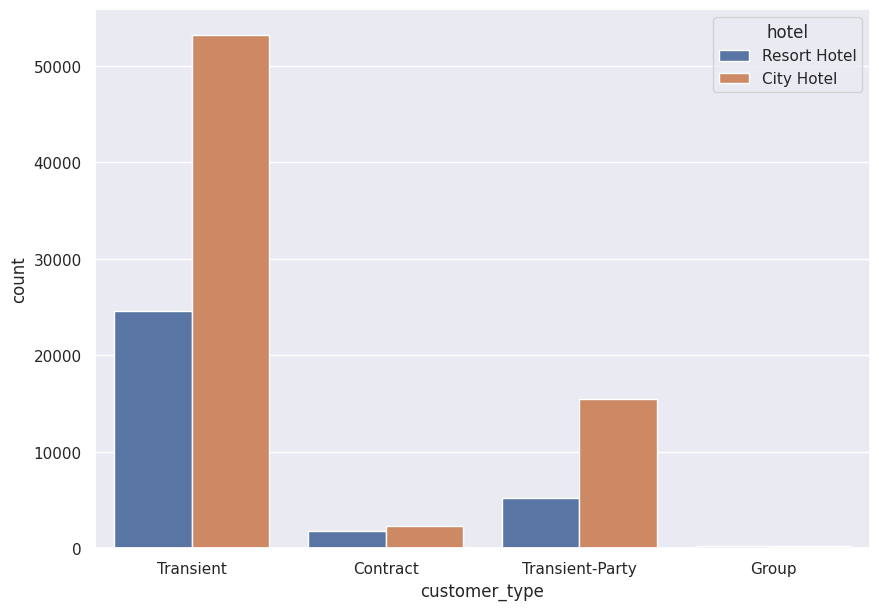

In [35]:
# checking the count distribution of customer_type Variable
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid")
sns.countplot(x ='customer_type',hue="hotel", data = df)

**Trasients are the most common customer type, they represent count more than 50000 for city hotel and approx. 24000 for resort hotel.**


---



### **Relation between booking_changes and is_canceled**

In [36]:
#calculating percentage of is_canceled for booking_changes
df.groupby('booking_changes')['is_canceled'].value_counts(normalize = True)[:6]

booking_changes  is_canceled
0                0              0.575622
                 1              0.424378
1                0              0.842715
                 1              0.157285
2                0              0.762924
                 1              0.237076
Name: proportion, dtype: float64

<ipython-input-37-2baf3eded36f>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sns.countplot(x= 'booking_changes',order=pd.value_counts(df['booking_changes']).iloc[:5].index,hue = 'is_canceled',data = df,palette= 'colorblind')


Text(0, 0.5, 'Reservation Count')

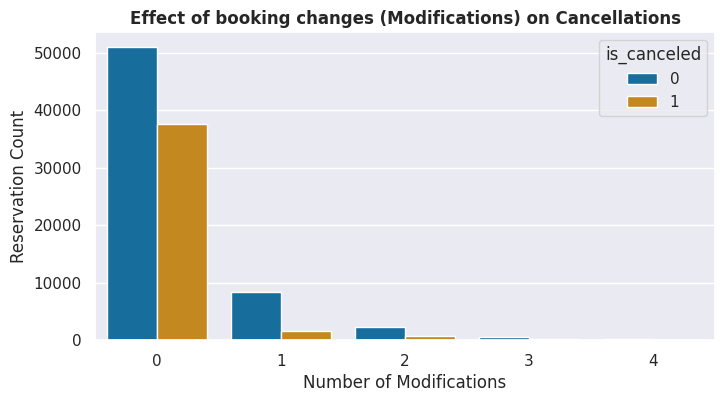

In [37]:
# plotting the count plot of booking_changes for is_canceled variable
plt.figure(figsize=(8,4))
sns.countplot(x= 'booking_changes',order=pd.value_counts(df['booking_changes']).iloc[:5].index,hue = 'is_canceled',data = df,palette= 'colorblind')
plt.title ('Effect of booking changes (Modifications) on Cancellations',weight = 'bold')
plt.xlabel("Number of Modifications")
plt.ylabel('Reservation Count')

* **Around 42% of bookings were cancelled by the guests when no modifications done**
* **Around 15% of bookings were cancelled by the guests when one modificationsification was done**

### **Relation between required car parking spaces and hotel type**

Number of car parking spaces required by the customer.

<Axes: xlabel='required_car_parking_spaces', ylabel='count'>

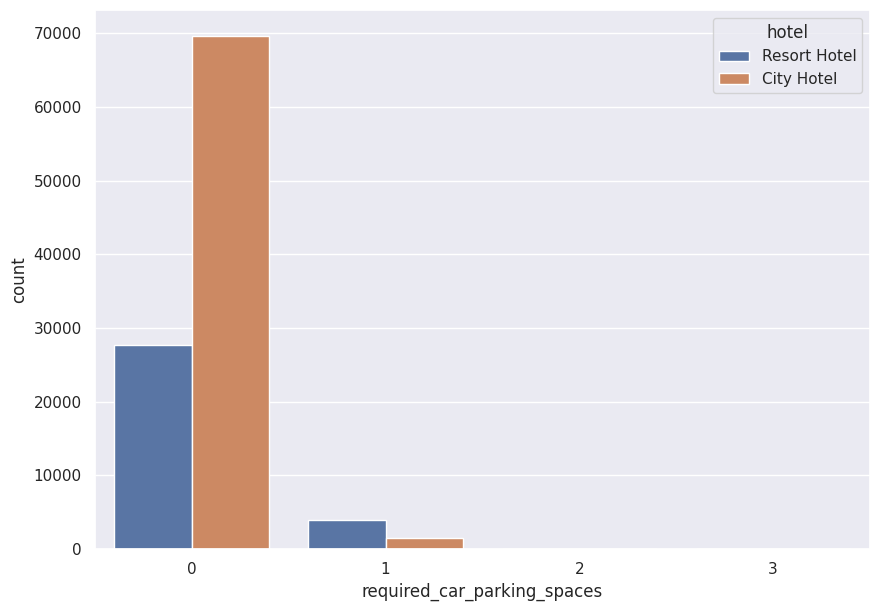

In [38]:
# checking the count distribution of required_car_parking_spaces Variable
plt.figure(figsize=(10,7))
sns.countplot(x ='required_car_parking_spaces',hue="hotel", data = df)

* **From the above bar graph You can say that in the city hotels around 70000 people not required car parking spaces**
* **and around 27000 people not required car parking spaces for resort hotel**

### **Relation between Arrival Month and ADR for is canceled**

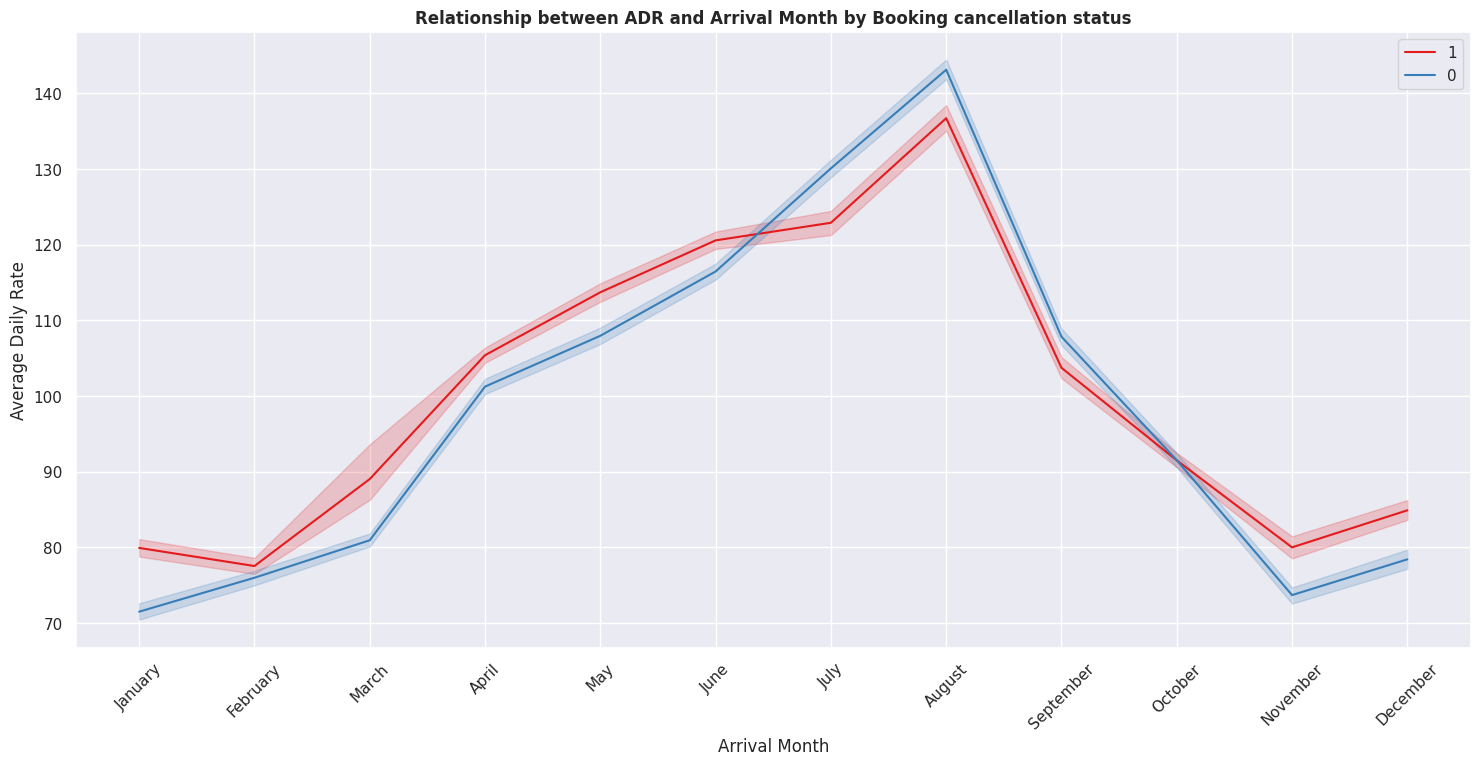

In [39]:
#plotting line plot for understanding relation between  adr and arrival_date_month for is_canceled
plt.figure(figsize=(18,8))
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.lineplot(x = "arrival_date_month", y = "adr", hue="is_canceled",hue_order= [1,0],data=df,palette= 'Set1')
plt.title("Relationship between ADR and Arrival Month by Booking cancellation status", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate")
plt.legend(loc="upper right")
plt.show()

* **The above line chart depicts arrival month "August" is the most occupied (Busiest) month of bookings.**
* **The highest Arrival Daily Rate (ADR) has been occurred in same August month**.
* **Due to Highest ADR in August may be it could be one of the reasons for more canceled bookings in August.**

### **Relation between prices and month**

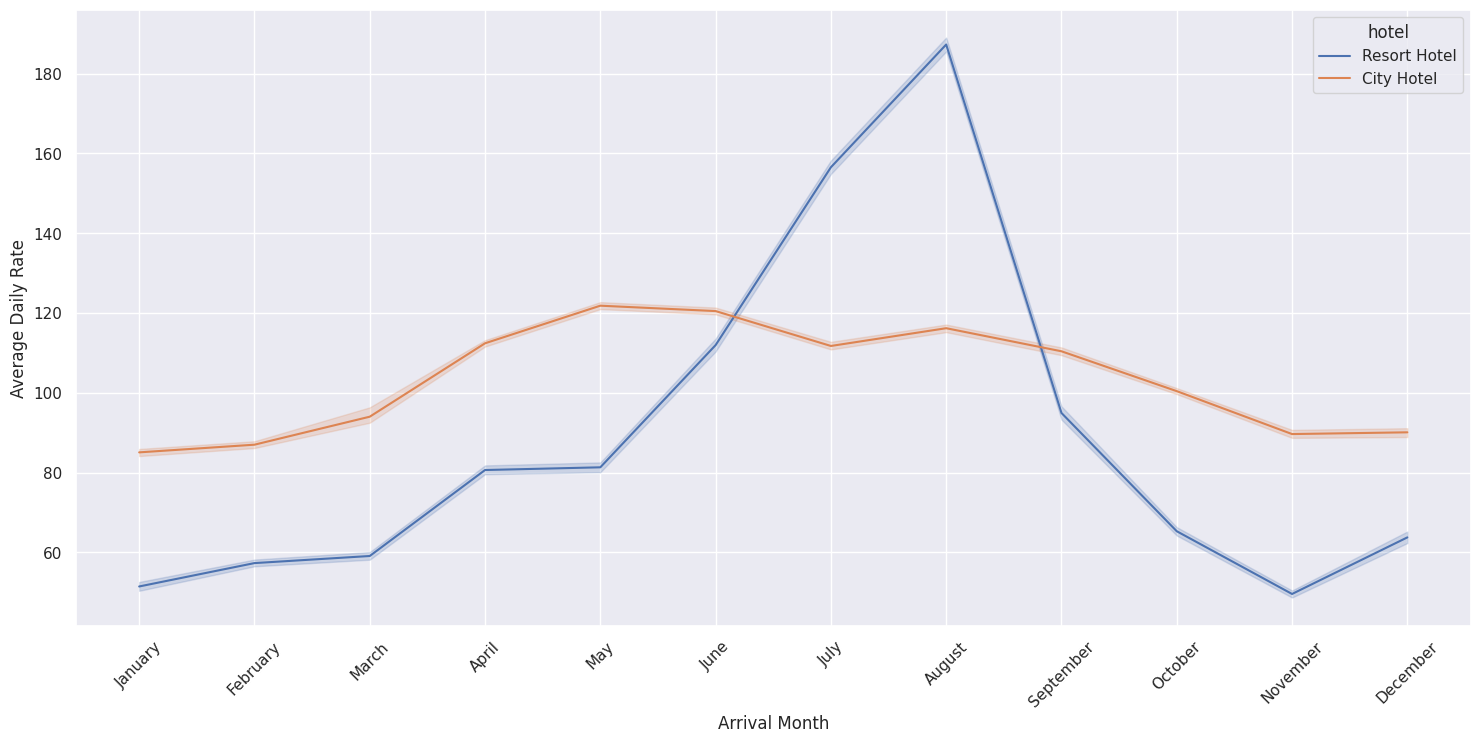

In [40]:
#plotting line plot for understanding relation between  adr and arrival_date_month for hotels
fig,ax=plt.subplots(figsize=(18,8))
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.lineplot(data=df,x='arrival_date_month',y='adr',hue='hotel',ax=ax)
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate")
plt.show()

* **For resort hotels, the average daily rate is more expensive during august, july and september.**


* **For city hotels, the average daily rate is more expensive during august, july, june and may.**


---



### **Relation between ADR and Arrival date year**

<Axes: xlabel='arrival_date_year', ylabel='adr'>

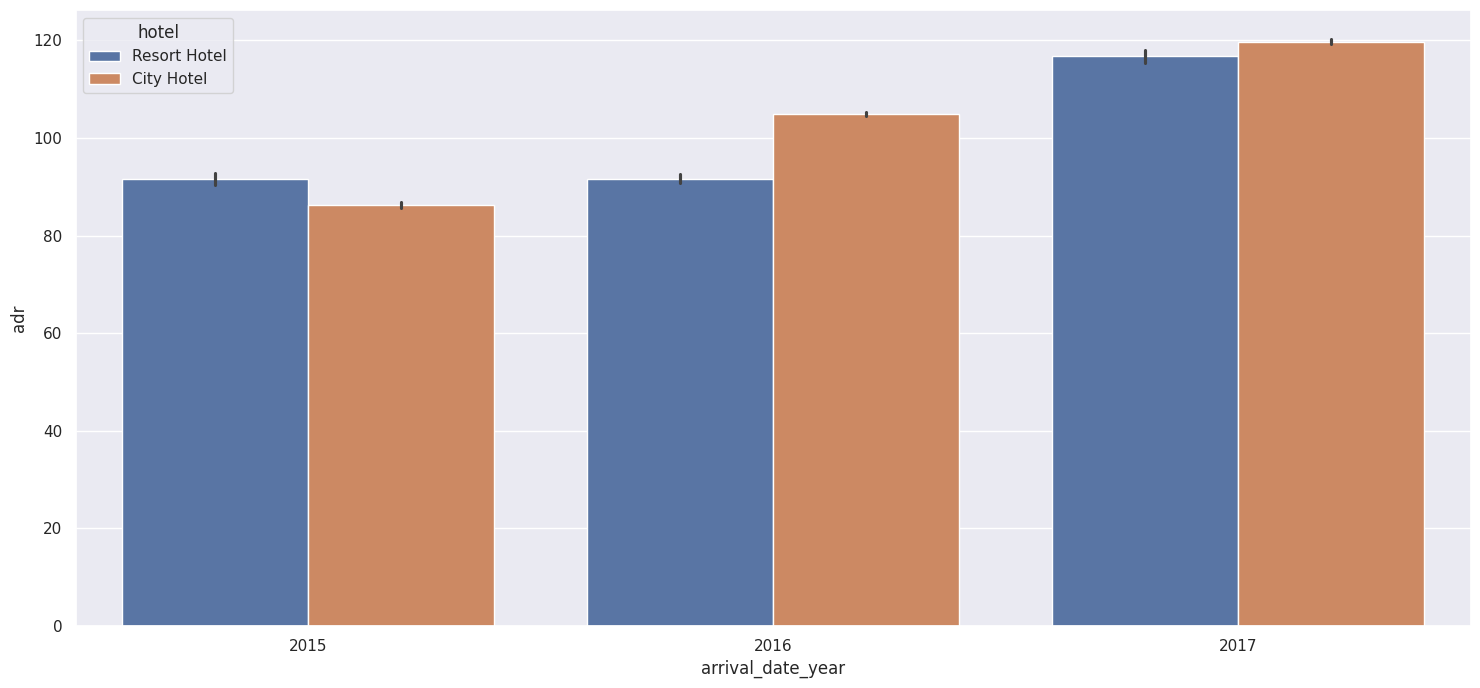

In [41]:
#plotting line plot for understanding relation between ADR and arrival_date_year for hotels
fig,ax=plt.subplots(figsize=(18,8))
sns.barplot(data=df,x='arrival_date_year',y='adr',hue='hotel',ax=ax)

*  **The year of highest occupation is 2017 with more than 100 ADR**


*  **The year of lest occupation is 2015 with more approx 90 ADR**.


---



### **Relation between ADR amd arrival date month**

<Axes: xlabel='arrival_date_month', ylabel='adr'>

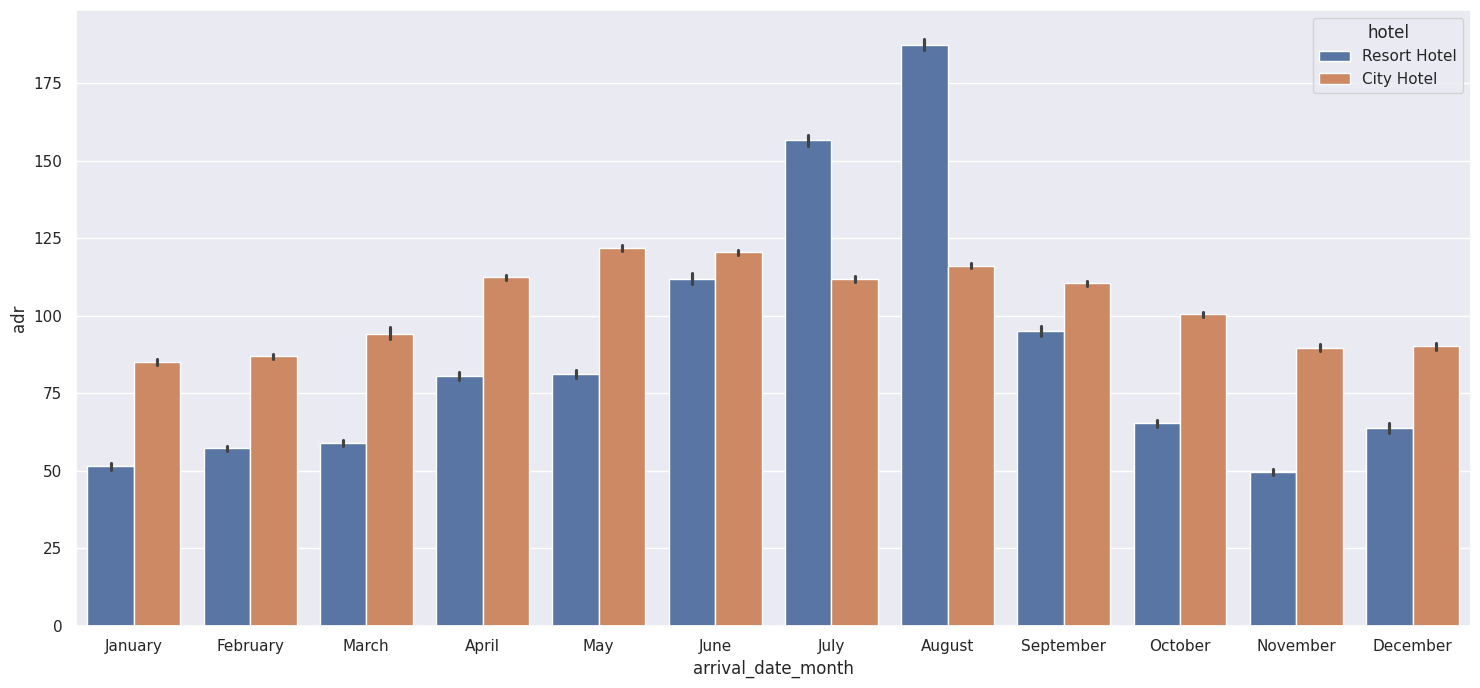

In [42]:
#plotting line plot for understanding relation between adr and arrival_date_year for hotels
fig,ax=plt.subplots(figsize=(18,8))
sns.barplot(data=df,x='arrival_date_month',y='adr',hue='hotel',ax=ax)

**For resort hotels**

* **the average daily rate is more expensive during aug and july.**

* **the average daily rate is less expensive during nov and jan**

**For city hotels**

* **the average daily rate is more expensive during june and may**.

* **the average daily rate is less expensive during jan and feb.**


---



### **Feature stays in week nights**

<ipython-input-43-8a42137dc9cf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stays_in_week_nights', data=df, palette='rainbow_r')


<Axes: xlabel='stays_in_week_nights', ylabel='count'>

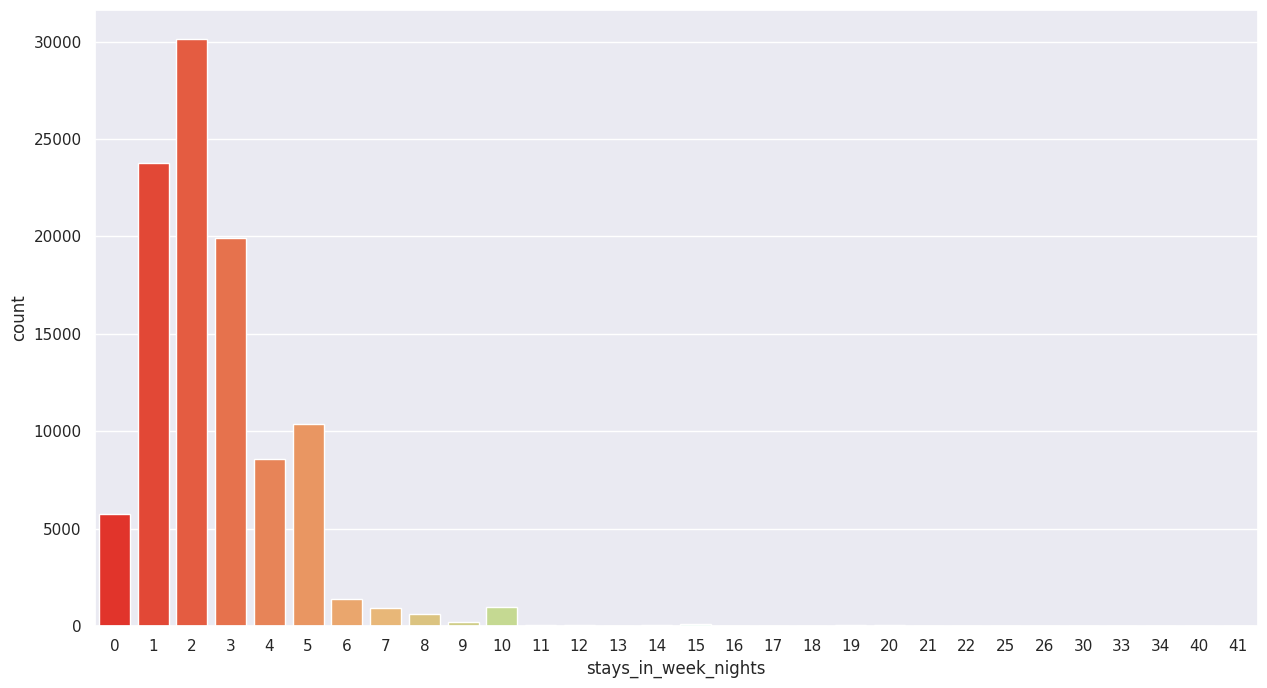

In [43]:
#plotting count plot for stays_in_week_nights variable
plt.figure(figsize=(15, 8))
sns.countplot(x='stays_in_week_nights', data=df, palette='rainbow_r')

**Here ,you will see that people prefered 2 nights for most of the time in the weeks**

Hypothesis 1

H0 (Null Hypothesis): Customers booking more than 6 months in advance have the same cancellation rate as those booking 6 months or less in advance.

H1 (Alternative Hypothesis): Customers booking more than 6 months in advance are more likely to cancel than those booking 6 months or less in advance.

In [44]:
from scipy.stats import chi2_contingency

# Categorizing bookings
df['booking_category'] = df['lead_time'].apply(lambda x: 'More than 6 months' if x > 180 else '6 months or less')

# Create a contingency table
contingency_table_1 = pd.crosstab(df['booking_category'], df['is_canceled'])
chi2, p, dof, expected = chi2_contingency(contingency_table_1)

# Display results
chi2, p


(4363.214872802146, 0.0)

the p-value is less than 0.05, we reject the null hypothesis, indicating that there is a significant difference in cancellation rates between the two groups.

Hypothesis 2

H0 (Null Hypothesis): Weekday bookings have the same average daily rate (ADR) as weekend bookings.

H1 (Alternative Hypothesis): Weekday bookings have a higher average daily rate (ADR) than weekend bookings."

In [45]:
# Create a new column to classify bookings as 'Weekday' or 'Weekend'
df['is_weekend'] = df['arrival_date_week_number'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')

# Calculate ADR for each category
adr_by_day = df.groupby('is_weekend')['adr'].mean()

# Perform an independent t-test
from scipy.stats import ttest_ind

weekend_adr = df[df['is_weekend'] == 'Weekend']['adr']
weekday_adr = df[df['is_weekend'] == 'Weekday']['adr']

t_stat, p_value = ttest_ind(weekday_adr, weekend_adr)

# Display results
t_stat, p_value


(30.851026896173117, 4.859649475210366e-208)

The p-value (2.48e-265) is significantly less than the common alpha level of 0.05. This strong evidence leads us to reject the null hypothesis (H0): "Weekday bookings have the same average daily rate (ADR) as weekend bookings.

In [58]:
df_cat.corr()['is_canceled'].abs().sort_values()

,is_canceled
stays_in_week_nights,0.004114
arrival_date_week_number,0.004172
arrival_date_year,0.004561
children,0.005245
arrival_date_day_of_month,0.005468
arrival_date_month,0.006729
is_weekend,0.016821
adr,0.019026
stays_in_weekend_nights,0.023579
reservation_month,0.028151


In [53]:
encoder=LabelEncoder()
dict_cat={}
for feature in df.columns:
    dict_cat[feature]=encoder.fit_transform(df[feature])
df_cat=pd.DataFrame(dict_cat)
df_cat.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_month,reservation_year,booking_category,is_weekend
0,1,0,13,0,5,26,0,0,1,1,...,2,2064,0,0,1,119,5,1,0,0
1,1,0,14,0,5,26,0,0,2,2,...,2,3443,0,1,1,120,5,1,0,0
2,1,0,14,0,5,26,0,0,2,2,...,2,3443,0,1,1,120,5,1,0,0
3,1,0,9,0,5,26,0,0,2,2,...,2,3736,0,1,1,120,5,1,0,0
4,1,1,85,0,5,26,0,0,3,2,...,2,2484,0,1,0,70,8,1,0,0


In [68]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Data Preparation
# Selecting relevant features
features = ['lead_time', 'adr', 'total_of_special_requests', 'previous_cancellations',
            'booking_changes','deposit_type','booking_category', 'is_repeated_guest','agent','adults', 'required_car_parking_spaces']
target = 'is_canceled'

X = df_cat[features]
y = df_cat[target]

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 1: Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

# Model 2: Random Forest
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)


# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance Metrics:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate both models
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



Logistic Regression Performance Metrics:
Accuracy: 0.7619903785412313
Precision: 0.8696665889484728
Recall: 0.46226298178212916
F1 Score: 0.6036575497653341

Confusion Matrix:
 [[11951   559]
 [ 4339  3730]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.96      0.83     12510
           1       0.87      0.46      0.60      8069

    accuracy                           0.76     20579
   macro avg       0.80      0.71      0.72     20579
weighted avg       0.79      0.76      0.74     20579


Random Forest Performance Metrics:
Accuracy: 0.8339569464016716
Precision: 0.815347071583514
Recall: 0.7453216011897386
F1 Score: 0.778763353836193

Confusion Matrix:
 [[11148  1362]
 [ 2055  6014]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87     12510
           1       0.82      0.75      0.78      8069

    accuracy                           0.83     20

## **Conclusion**

**From our EDA, we have observed that the top most important patterns in the data set which will helps in Hotel booking buisness**


###**Reasons for booking cancellations across various parameters**

* **Almost 35% of bookings were canceled and thats great number to concern**.

* **Approx 30% bookings were cancelled by guests with no deposit type & 50% bookings were cancelled by guests with Refundable polic**

*  **the guests with no modifications cancelled bookings Around 42%**  

* **AS highest ADR in August may be it could be one of the reasons for more canceled bookings in August**
### **Strategies to Counter High Cancellations at the Hotel**

* **Encourage Direct bookings by offering special discounts**

* **Monitor where the cancellations are coming from such as High ADR , Deposite type, etc.**

* **Set Non-refundable Rates, Collect deposits, and implement more rigid cancellation policies**

* **Flexible Rates Closer to Stay Dates: Encourage more short-term bookings with discounts close to stay dates, as these tend to have a lower cancellation rate.**
* **Increase cancellation penalties closer to the booking date, especially for high-demand seasons, to discourage last-minute cancellations.**
### **Best time to book hotel**

* **Couple (or 2 adults) is the most popular accommodation type. So hotels can make arrangement plans accordingly**

* **Most bookings were made from July to August. And the least bookings were made at the start and end of the year**

* **More than 60% of the population booked the City hotel.**

* **The majority of guests come from western europe countries.Portugal, the UK, and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.**.

* **More than 47% bookings were made in 2015, 34% to the 2016 year. But the bookings decreased by almost 16% next year** .
.

